In [1]:
from accelerator import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def test_tune_turn_convergence(lattice):
    scan_turns = [64, 128, 256, 512, 1024, 2048, 5012, 10024]  # np.linspace(100, 5000, 20, dtype=int)
    tunes = []
    for n_turns in scan_turns:
        tunes.append(FODO_thin.tune(n_turns=n_turns))
    plt.plot(scan_turns, tunes)
    plt.xlabel('number of turns')
    plt.ylabel('tune')

# Thin lattice

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

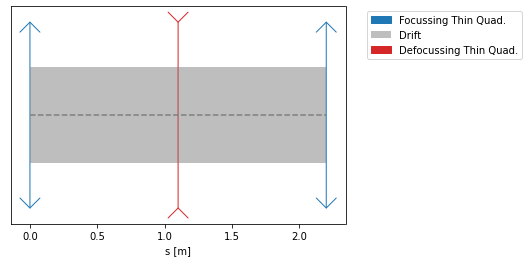

In [3]:
f = 8
l_drift = 1.1

quad_F = QuadrupoleThin(f*2)
quad_D = QuadrupoleThin(-f)
drift = Drift(l_drift)

FODO_thin = Lattice([quad_F, drift, quad_D, drift, quad_F])
lattice_thin = FODO_thin*100
FODO_thin.plot()

(0.9782363755364666, 0.020860156021239862, 0.027795558859837286)
(0.9781011742646414, 0.02188657189775351, 0.02194029640882864)
(0.021908474311847212, 0.9780990796616079, 0.022254857537091423)
(0.021901268121348894, 0.9780989304616353, 0.021906100395857966)
(0.9780989196893305, 0.021900923657632253, 0.021942383192117724)
(0.9780989193846413, 0.02190107536574314, 0.021901988084347897)
(0.02190108053632395, 0.9780989193609514, 0.021901078870671848)
(0.02190108082435578, 0.9780989193596785, 0.021902181724738762)


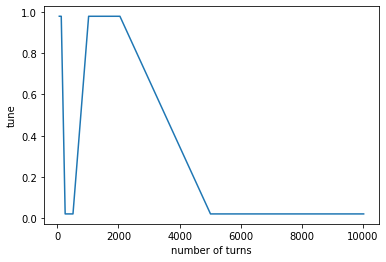

In [4]:
test_tune_turn_convergence(lattice_thin)

In [5]:
FODO_thin.tune()

(0.9780989196893305, 0.021900923657632253, 0.021942383192117724)


0.9780989196893305

In [6]:
FODO_thin.chromaticity()

(0.9780989196893305, 0.021900923657632253, 0.021942383192117724)
(0.02168392856060449, 0.9783161001348268, 0.021685595315658814)
0.9780989196893305
0.02168392856060449


-95.6414991128726

In [7]:
lattice_thin.tune()

(0.19010806544843104, 0.8098919360427504, 0.19010955030463209)


0.19010806544843104

In [8]:
lattice_thin.chromaticity()

(0.19010806544843104, 0.8098919360427504, 0.19010955030463209)
(0.8316099479041846, 0.16839004822630266, 0.168390646665736)
0.19010806544843104
0.8316099479041846


-64.15018824557535

In [9]:
def thin_lattice_factory(strength):
    f = 1/strength
    l_drift = 1.1

    quad_F = QuadrupoleThin(f*2)
    quad_D = QuadrupoleThin(-f)
    drift = Drift(l_drift)

    return Lattice([quad_F, drift, quad_D, drift, quad_F])

(0.18537229344092593, 0.814627705744705, 0.18537172241761532)
(0.2028075466821359, 0.797192454645061, 0.202808867806023)
(0.22098112914150472, 0.7790188703212131, 0.220980685634644)
(0.24006409431392575, 0.7599359049724337, 0.2400633735963709)
(0.2602899318296506, 0.7397100714393212, 0.2602922280367141)
(0.28199332529467985, 0.7180066745536924, 0.2819931328302613)
(0.6943135968197202, 0.3056864034159516, 0.3056860793338818)
(0.3322291283676132, 0.66777087232329, 0.3322295871086496)
(0.6367067561152321, 0.36329324408104385, 0.36329207358171584)
(0.40316455209456464, 0.5968354455402416, 0.4031630298442071)
(0.48561896053980075, 0.5143809949123374, 0.4856180351520433)
(0.5, 0.500000784558782, 0.4999991416626394)


/home/lcoyle/.cache/pypoetry/virtualenvs/accelerator-7M8YfYAd-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/lcoyle/projects/accelerator/accelerator/elements/base.py:52: RuntimeWarning: overflow encountered in matmul
  return (self._get_transfer_matrix() @ phase_coords) + self._non_linear_term(
/home/lcoyle/projects/accelerator/accelerator/elements/base.py:52: RuntimeWarning: invalid value encountered in matmul
  return (self._get_transfer_matrix() @ phase_coords) + self._non_linear_term(
/home/lcoyle/projects/accelerator/accelerator/harmonic_analysis.py:66: RuntimeWarning: invalid value encountered in cdouble_scalars
  delta = delta * np.real((r[km] - r[kp]) / (2 * r[k] - r[km] - r[kp]))


(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)


/home/lcoyle/projects/accelerator/accelerator/elements/quadrupole.py:185: RuntimeWarning: overflow encountered in double_scalars
  out[1] = -one_over_f * phase_coords[0] + phase_coords[1]


(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)
(nan, nan, nan)


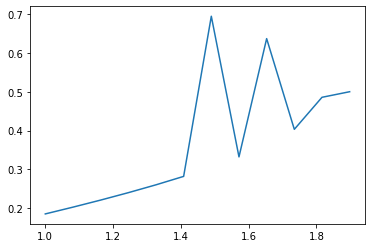

In [10]:
scan_strengths = np.linspace(1, 5, 50)
tunes = []
for strength in scan_strengths:
    tunes.append(thin_lattice_factory(strength).tune())
plt.plot(scan_strengths, tunes)

# Thick elements

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

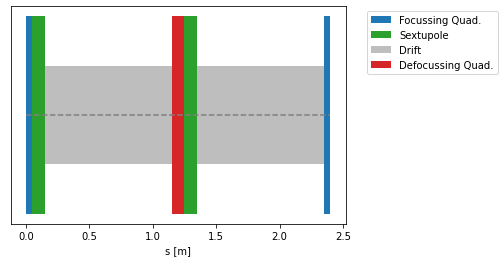

In [11]:
k = 1/0.8
l_quad = 0.1
l_drift = 1

quad_F = Quadrupole(k, l_quad/2)
quad_D = Quadrupole(-k, l_quad)
sext_f = Sextupole(1e-3, 0.1)
sext_d = Sextupole(1e-3, 0.1)
drift = Drift(l_drift)

FODO_thick = Lattice([quad_F,
                      sext_f,
                      drift,
                      quad_D,
                      sext_d,
                      drift,
                      quad_F])
lattice_thick = FODO_thick*100
FODO_thick.plot()

(0.9782363755364666, 0.020860156021239862, 0.027795558859837286)
(0.9781011742646414, 0.02188657189775351, 0.02194029640882864)
(0.021908474311847212, 0.9780990796616079, 0.022254857537091423)
(0.021901268121348894, 0.9780989304616353, 0.021906100395857966)
(0.9780989196893305, 0.021900923657632253, 0.021942383192117724)
(0.9780989193846413, 0.02190107536574314, 0.021901988084347897)
(0.02190108053632395, 0.9780989193609514, 0.021901078870671848)
(0.02190108082435578, 0.9780989193596785, 0.021902181724738762)


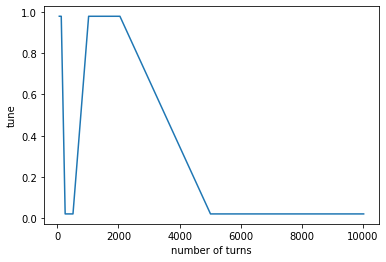

In [12]:
test_tune_turn_convergence(lattice_thick)

In [13]:
quad_F.m

TransferMatrix([[ 0.99843791,  0.04997396,  0.        ,  0.        ,
                  0.        ],
                [-0.06246745,  0.99843791,  0.        ,  0.        ,
                  0.        ],
                [ 0.        ,  0.        ,  1.00156291,  0.05002605,
                  0.        ],
                [ 0.        ,  0.        ,  0.06253256,  1.00156291,
                  0.        ],
                [ 0.        ,  0.        ,  0.        ,  0.        ,
                  1.        ]])

In [14]:
quad_D.m

TransferMatrix([[ 1.00625651,  0.10020846,  0.        ,  0.        ,
                  0.        ],
                [ 0.12526058,  1.00625651,  0.        ,  0.        ,
                  0.        ],
                [ 0.        ,  0.        ,  0.99375651,  0.0997918 ,
                  0.        ],
                [ 0.        ,  0.        , -0.12473975,  0.99375651,
                  0.        ],
                [ 0.        ,  0.        ,  0.        ,  0.        ,
                  1.        ]])

In [15]:
FODO_thick.tune()

(0.9767788076277176, 0.023221176863748107, 0.02322125898212109)


0.9767788076277176

In [16]:
FODO_thick.tune(dp=1e-6)

(0.9767788308902174, 0.023221153613075054, 0.023221235303301353)


0.9767788308902174

In [17]:
FODO_thick.chromaticity()

(0.9767788076277176, 0.023221176863748107, 0.02322125898212109)
(0.022991027984900995, 0.9770091226578957, 0.023069793333748638)
0.9767788076277176
0.022991027984900995


-95.37877796428165

In [18]:
1 - 0.9766619089285522

0.023338091071447797

In [19]:
lattice_thick.tune()

(0.32211929857104243, 0.6778807004472659, 0.3221181868174303)


0.32211929857104243

In [20]:
lattice_thick.chromaticity()

(0.32211929857104243, 0.6778807004472659, 0.3221181868174303)
(0.29908779002020963, 0.700912209729731, 0.2990876062013568)
0.32211929857104243
0.29908779002020963


-2.30315085508328

In [21]:
lattice_thick.chromaticity(plane='v')

(0.3221192985710408, 0.6778807004472674, 0.32211818681786847)
(0.2990877900202084, 0.7009122097297323, 0.29908760620116187)
0.3221192985710408
0.2990877900202084


-2.303150855083241

(0.9782363755364666, 0.020860156021239862, 0.027795558859837286)
(0.9781011742646414, 0.02188657189775351, 0.02194029640882864)
(0.021908474311847212, 0.9780990796616079, 0.022254857537091423)
(0.021901268121348894, 0.9780989304616353, 0.021906100395857966)
(0.9780989196893305, 0.021900923657632253, 0.021942383192117724)
(0.9780989193846413, 0.02190107536574314, 0.021901988084347897)
(0.02190108053632395, 0.9780989193609514, 0.021901078870671848)
(0.02190108082435578, 0.9780989193596785, 0.021902181724738762)


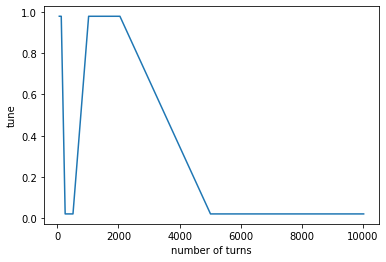

In [22]:
test_tune_turn_convergence(FODO_thick)

# More complex

In [23]:
circumference = 1000
n_cells = 20
cell_length = circumference / n_cells

dipole_length = 5
dipole_angle = 2 * np.pi / (n_cells * 4)
dipole_bending_radius = dipole_length / dipole_angle

quadrupole_length = 3
quadrupole_strength = 1e-2

drift_length = (circumference / n_cells - (2 * quadrupole_length) - (4 * dipole_length)) / 6

In [24]:
dipole = Dipole(dipole_bending_radius, dipole_angle)
quad_f = Quadrupole(quadrupole_strength, quadrupole_length, name='quad_f')
quad_d = Quadrupole(-quadrupole_strength, quadrupole_length, name='quad_d')
drift = Drift(drift_length)
drift_half = Drift(drift_length / 2)

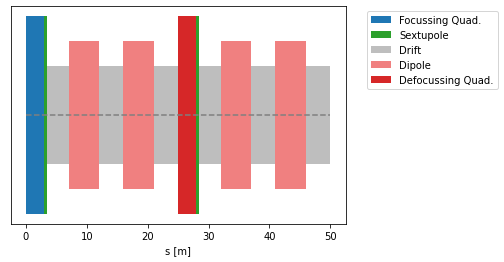

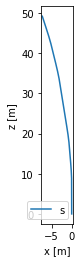

In [25]:
l_sext = 0.5
k_sext_f = 1e-3
k_sext_d = -1e-3
sext_f = Sextupole(k_sext_f, l_sext, name="sextupole_f")
sext_d = Sextupole(k_sext_d, l_sext, name="sextupole_d")
FODO_sext = Lattice([quad_f,
                     sext_f,
                     Drift(drift_length - l_sext),
                     dipole,
                     drift,
                     dipole,
                     drift,
                     quad_d,
                     sext_d,
                     Drift(drift_length - l_sext),
                     dipole,
                     drift,
                     dipole,
                     drift,
                     ])
FODO_sext.plot()
FODO_sext.plot.top_down()
lattice_sext = FODO_sext * n_cells

(0.9782363755364666, 0.020860156021239862, 0.027795558859837286)
(0.9781011742646414, 0.02188657189775351, 0.02194029640882864)
(0.021908474311847212, 0.9780990796616079, 0.022254857537091423)
(0.021901268121348894, 0.9780989304616353, 0.021906100395857966)
(0.9780989196893305, 0.021900923657632253, 0.021942383192117724)
(0.9780989193846413, 0.02190107536574314, 0.021901988084347897)
(0.02190108053632395, 0.9780989193609514, 0.021901078870671848)
(0.02190108082435578, 0.9780989193596785, 0.021902181724738762)


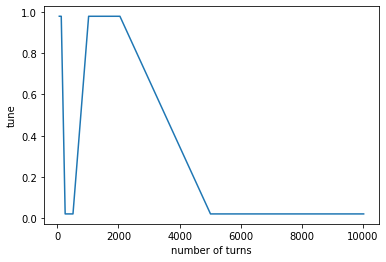

In [26]:
test_tune_turn_convergence(lattice_sext)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

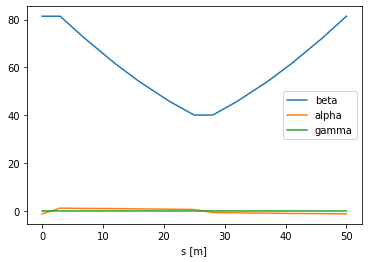

In [27]:
FODO_sext.twiss('h').plot()

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='s [m]', ylabel='x [m]'>)

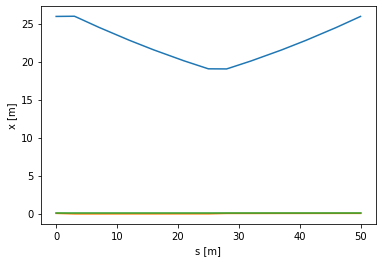

In [28]:
FODO_sext.dispersion().plot('h')

In [29]:
FODO_sext.tune(dp=0)

(0.14219268309131744, 0.8578073131219193, 0.14219248933714201)


0.14219268309131744

In [30]:
FODO_sext.tune(dp=1e-3)

(0.0, 0.14213935606853564, 0.8578606491322996)


0.14213935606853564

In [31]:
lattice_sext.tune()

(0.15614625967644247, 0.84385374138172, 0.1561476562408833)


0.15614625967644247

In [32]:
lattice_sext.tune(dp=1e-3)

(0.0, 0.8427870215660158, 0.15721297825081992)


0.8427870215660158

In [33]:
FODO_sext.chromaticity()

(0.14219268309131744, 0.8578073131219193, 0.14219248933714201)
(0.0, 0.14167299580300563, 0.8583270052073271)
0.14219268309131744
0.14167299580300563


-0.05196872883118098

In [34]:
FODO_sext.chromaticity('v')

(0.11711163544495258, 0.8828883649009991, 0.1171120472110265)
(0.11609336126911259, 0.883906639893479, 0.9744204899893162)
0.11711163544495258
0.11609336126911259


-0.10182741758399949

In [35]:
lattice_sext.chromaticity()

(0.15614625967644247, 0.84385374138172, 0.1561476562408833)
(0.0, 0.16654166183767585, 0.8334583424623557)
0.15614625967644247
0.16654166183767585


-1.0395402161233358

In [36]:
lattice_sext.chromaticity('v')

(0.34223270262629996, 0.6577672977020232, 0.34223394274070035)
(0.6781336641656177, 0.3218663387540368, 0.3206508320449255)
0.34223270262629996
0.6781336641656177


-33.59009615393178

In [37]:
lattice_sext.transport()

TypeError: transport() missing 1 required positional argument: 'initial'